# CS 109A/AC 209A/STAT 121A Data Science: Homework 2
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 21st, 2016 at 11:59pm

Import libraries

In [4]:
import numpy as np
import pandas as pd
import random
import sklearn as sk
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.cross_validation import train_test_split as sk_split
from sklearn.linear_model import LinearRegression as Lin_Reg
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Halperin, Keyan]

### Part (b): Course Number

[STATS 121a]

---

## Problem 1: Inside the Models in Scikit-learn

In this problem, we will be implementing K-Nearest Neighbour and simple linear regression for predicting a quantitative variable. We will compare the performance of our implementation with those of Scikit-learn (``sklearn``).

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y. 

### Part (a): Implement the models by hand
In this part you **may not** use ``sklearn`` for any task.

In the following, you may use ``numpy`` arrays instead of ``pandas`` dataframes.

- Implement a funtion ``split``, which satifies:
    - input: an ``nx2`` dataframe ``data``, a float ``m``
    - return: an ``nx2`` dataframe ``train`` and an ``nx2`` dataframe ``test``, consisting of ``m`` percent and ``100 - m`` percent of the data, respectively.


- Implement K-Nearest Neighbour for predicting a quantitative variable. That is, write a function, ``knn_predict``, that satisfies:
    - input: an integer ``k``, an ``n x 2`` dataframe training set ``train``, an ``n x 1`` dataframe testing set ``test``
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.



- Implement linear regression for predicting a quantitative variable. That is, write a function ``linear_reg_fit`` that satisfies:
    - input: an ``nx2`` dataframe training set ``train``
    - return: the coefficients of the linear regression model - a float ``slope`` and a float ``intercept``.
    
    
- Write a function ``linear_reg_predict`` that satisfies:
    - input: an ``nx1`` dataframe testing set ``test``, as well as the coefficients of the linear regression model
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.
    
    
- Implement a function ``score`` that satisfies:
    - input: an ``nx2`` dataframe ``predicted``, an ``nx2`` dataframe ``actual`` 
    - return: R^2 coefficient of the fit of the predicted values.

In [4]:
def split(data, m):
    train = data.sample(frac=float(m)/100, random_state=1) #Set random state for replicibility of homework
    test = data.drop(train.index)
    return {'test':test, 'train':train}

#Function test
df_test = pd.DataFrame({'A': [10,11,12,13,14],'B': [21,22,23,24,25]})
print '\nFull Data\n', df_test

print '\nTrain Data\n', split(df_test, 60.0)['train']
print '\nTest Data\n', split(df_test, 60.0)['test']


Full Data
    A   B
0  10  21
1  11  22
2  12  23
3  13  24
4  14  25

Train Data
    A   B
2  12  23
1  11  22
4  14  25

Test Data
    A   B
0  10  21
3  13  24


In [7]:
def knn_predict(train, test, k):    
    
    d = [[-1]*len(train) for i in range(len(test))]
    
    #Find distance between each observation in test data and each observation in the train data for each subtype
    #Store distance in 'd'
    for i in range(len(test)):
        for j in range(len(train)):
             d[i][j] = abs(test.iloc[i,0] - train.iloc[j,0])
    
    min_loc = [[-1]*k for i in range(len(test))]
    min_val = [[-1]*k for i in range(len(test))]
    for i in range(len(test)):
        for j in range(k): 
            min_loc[i][j] = np.argpartition(d[i], k)[j] #Find the indices of the k smallest distances
            min_val[i][j] = train.iloc[min_loc[i][j],1] #Find the y-values for the observations with the k smallest distances
    
    #Take the mean for each set of k observations and store to list 'pred'
    pred = []
    for i in range(len(test)):
        pred.append(np.mean(min_val[i])) 
        
    pred = pd.Series(pred, name='predicted')    
    df = pd.concat([test,pred], axis=1) #Combine to create a new data frame
    return df


#Test function
train1 = pd.DataFrame({'A': [1,3,5,7,9],'B': [1,3,5,7,8]})
print 'Train Data \n',train1

test1 = pd.DataFrame({'A': [2,4,6,8,10]})
print '\nTest Data \n', test1

print '\n', knn_predict(train1, test1, 2)

Train Data 
   A  B
0  1  1
1  3  3
2  5  5
3  7  7
4  9  8

Test Data 
    A
0   2
1   4
2   6
3   8
4  10

    A  predicted
0   2        2.0
1   4        4.0
2   6        6.0
3   8        7.5
4  10        7.5


In [4]:
def linear_reg_fit(train):   

    x = train.iloc[:,0]
    y = train.iloc[:,1]
    xbar = np.mean(x)
    ybar = np.mean(y)
    
    sxy = sum((x[i] - xbar)*(y[i] - ybar) for i in range(len(x)))
    sxx = sum((x[i] - xbar)**2 for i in range(len(x)))
 
    b1 = sxy/sxx
    b0 = ybar - b1*xbar
    
    b1 = round(b1, 5)
    b0 = round(b0, 5)
     
    return {'intercept':b0, 'slope':b1}


#Test function
train1 = pd.DataFrame({'A': [1,3,5,7,9],'B': [2,6,10,12,15]})
print train1

linear_reg_fit(train1)

   A   B
0  1   2
1  3   6
2  5  10
3  7  12
4  9  15


{'intercept': 1.0, 'slope': 1.6}

In [116]:
def linear_reg_predict(test, a, b):
    
    pred=[]
    
    for x in test.iloc[:,0]:
        pred.append(a+b*x)
    
    pred = pd.Series(pred, name='predicted')
    df = pd.concat([test, pred], axis=1)
    
    return df


#Test function
test1 = pd.DataFrame({'A': [1,3,5,7,9]})
print '\nTest Data \n', test1

linear_reg_predict(test1, 1, 2)


Test Data 
   A
0  1
1  3
2  5
3  7
4  9


,A,predicted
0,1,3
1,3,7
2,5,11
3,7,15
4,9,19


In [100]:
def score(pred, act):
    
    y_pred = pred.iloc[:,1]
    y = act.iloc[:,1]
    ybar = np.mean(y)
    
    x = pred.iloc[:,0]
    
    tss = sum((y[i] - ybar)**2 for i in range(len(y)))
    rss = sum((y[i] - y_pred[i])**2 for i in range(len(y)))
    
    r_sq = (tss-rss)/float(tss)
    return round(r_sq, 3)


#Test function
act = pd.DataFrame({'A': [1,3,5,7,9],'B': [2,3,5,7,8]})

pred = pd.DataFrame({'A': [1,3,5,7,9],'B': [3,4,4,7,9] })

print 'R-sq = ', score(pred, act)

R-sq =  0.846


### Part (b): Compare with ``sklearn``

- Load the contents of ``dataset_1_full.txt`` into a ``pandas`` dataframe, or ``numpy`` array. 


- Use your functions from Part (a) to split the data into training and testing sets (70-30). Evaluate how KNN and linear regression each perform on this dataset.


- Use ``sklearn`` to split the data into training and testing sets (70-30). Use ``sklearn`` to evaluate how KNN and linear regression each perform on this dataset.


- Use Python's ``time`` library to measure how well your implementations compare with that of ``sklearn``. What can you do (algorithmically or codewise) to make your implementation faster or more efficient?

In [122]:
data1 = pd.read_csv("dataset_1_full.txt")
train1 = split(data1, 70.0)['train'].reset_index(drop=True)
test1 = split(data1, 70.0)['test'].reset_index(drop=True)
test1_x = pd.DataFrame({'x': test1.iloc[:,0]})

print '\nTrain Data Head \n', train1.head()
print '\nTest Data Head \n', test1_x.head()

t0 = time.clock()
pred_test1 = knn_predict(train1, test1_x, 2)
print '\nKNN Pred Data Head \n', pred_test1.head()
print '\nKNN R-sq = ', score(pred_test1, test1)
print '\nKNN Procedure Time:', round(time.clock() - t0, 5)

t0 = time.clock()
linear_reg_fit(train1)
pred_test1 = linear_reg_predict(test1_x, 1.03224, 2.90873)
print '\nLin Pred Data Head \n', pred_test1.head()
print '\nLin R-sq = ', score(pred_test1, test1)
print '\nLin Procedure Time:', round(time.clock() - t0, 5)


Train Data Head 
          x         y
0  0.584045  5.235215
1  0.765767  2.655709
2  0.656841  3.087458
3  0.839888  2.442013
4  0.410898  2.453266

Test Data Head 
          x
0  0.573076
1  0.503775
2  0.594027
3  0.393691
4  0.827864

KNN Pred Data Head 
          x  predicted
0  0.573076   3.176786
1  0.503775   3.553508
2  0.594027   2.439682
3  0.393691   2.978099
4  0.827864   3.468356

KNN R-sq =  0.219

KNN Procedure Time: 15.3176

Lin Pred Data Head 
          x  predicted
0  0.573076   2.699164
1  0.503775   2.497584
2  0.594027   2.760104
3  0.393691   2.177380
4  0.827864   3.440274

Lin R-sq =  0.445

Lin Procedure Time: 0.02128


Just by looking at the R-squared values, it appears that the linear model does a better job imputing the missing values, but we will look at this in more detail later.

In [121]:
#sklearn functions

data1 = pd.read_csv("dataset_1_full.txt")
x_train, x_test, y_train, y_test = sk_split(data1['x'], data1['y'], test_size=0.3, random_state=2)

x_train = x_train.values.reshape(len(x_train), 1)
x_test = x_test.values.reshape(len(x_test), 1)

t0 = time.clock()
knn = KNN(2)
knn.fit(x_train, y_train)
pred_y = knn.predict(x_test)

print 'KNN R-sq = ', round(knn.score(x_test, y_test), 3)
print 'KNN Procedure Time:', round(time.clock() - t0, 5)

t0 = time.clock()
reg = Lin_Reg()
reg.fit(x_train, y_train)
pred_y = reg.predict(x_test)

print '\nLin R-sq = ', round(reg.score(x_test, y_test), 3)
print 'Lin Procedure Time:', round(time.clock() - t0, 5)

KNN R-sq =  0.227
KNN Procedure Time: 0.00277

Lin R-sq =  0.465
Lin Procedure Time: 0.00149


My KNN function took about 16 seconds, while the sklearn one took only .002 seconds. The reason my function is fairly slow is that I am calculating and storing the distance between every observation in the training set (350) and every observation in the testing set (150), which gives me a total of 52,500. Then for each observation in the test set, I sort all of its distances from the test set in order to find the k smallest ones.

One way I could have made this more efficient would be to simply keep track of the k smallest distances so far. That way, only distances that were among the k smallest would have to be stored, and it would be necessary to sort the distances afterwards.

My linear regression function took about .02 seconds, while the sklearn one also took only .002 seconds. Not sure what I could have done to make it faster.

The sklearn R-squared values are very close to the ones that I found using the functions I created. The small differences are most likely due to sampling variation.

## Problem 2: Handling Missing Data

In this problem, we will be handling the problem of datasets with missing values. Clearly, we cannot simply remove entire rows or columns that contain missing values. In this problem, we explore two different ways to fill in missing values.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

In this problem, you **may not** use ``sklearn`` or build-in ``pandas`` functions to **directly fill in missing values**. Usage of these libraries/pakcages for related tasks is fine.

### Part (a): Model Based Data Imputation

- Describe in detail how predictive models for data (like KNN and simple linear regression) can be used to fill in missing values in a data set.


- Implement your scheme. That is, write code (preferably a function ``fill`` or two functions ``fill_knn``, ``fill_lin_reg``), which takes an ``n x 2`` dataframe or array with values missing in the 2nd column and fills in these values using KNN and linear regression. 


- You need to, also, write code to evaluate the quality of the values you've filled in.

It is often reasonable to assume that observations that are similar according to all known variables are also similar with regards to unknown/missing variables. For example, if two individuals have a very similar age, weight, height, race, and gender, we would also expect them to have a similar blood pressure. So if one of those individuals’ blood pressure data is missing, we could simply impute the missing value with the known blood pressure of the other individual. 

One way to determine how similar observations are is by calculating the distance between their points with respect to the available covariates. And so the shorter the distance, the more similar the observation. However, it is often preferable to combine the data from multiple similar observations instead (usually by taking their mean) because it provides more information, and the particular value for one observation is subject to much more random variation than the mean of several values. 

This is why KNN and other predictive models can be used to impute missing data. Imputing missing data with linear regression is analogous, but it makes specific assumptions about the relationship between the covariates and the missing value. In particular, that the relationship is linear, which may not necessarily be true.  

In [6]:
def fill_lin_reg(data, full_data = None):
    
    miss_ind = data[pd.isnull(data['y'])].index
    data_test = data.iloc[miss_ind]
    data_train = data.drop(miss_ind)

    trainx = data_train['x'].values.reshape(len(data_train), 1)
    trainy = data_train['y'].values
    testx = data_test['x'].values.reshape(len(data_test), 1)

    reg = Lin_Reg()
    reg.fit(trainx, trainy)
    pred_y = reg.predict(testx)
        
    pred_data = data.copy()
    pred_data.iloc[miss_ind, 1] = pd.Series(pred_y, index=miss_ind)
    
    #If full data is not provided, simply return the data with the imputed missing values
    #If full data is provided, calculate and print R-sq as well in order to evaluate the quality of the imputation
    if full_data is None:
        return pred_data
    else:
        testy = full_data.iloc[miss_ind]['y'].values
        r = reg.score(testx, testy)
        print '\n R-sq =', round(r, 4)
        return pred_data
  
#Test 
data1 = pd.read_csv('dataset_1_missing.txt')
full_data1 = pd.read_csv('dataset_1_full.txt')
print 'Data Head \n', data1[:5]

#print fill_lin_reg(data1)[:5] also works
print fill_lin_reg(data1, full_data1)[:5]

Data Head 
          x         y
0  0.177418  1.401178
1  0.573076       NaN
2  0.503775  1.684924
3  0.594027  3.898209
4  0.335754       NaN

 R-sq = 0.44
          x         y
0  0.177418  1.401178
1  0.573076  2.712322
2  0.503775  1.684924
3  0.594027  3.898209
4  0.335754  2.014892


In [7]:
def fill_knn(data, full_data = None, k=1):
    
    miss_ind = data[pd.isnull(data['y'])].index
    data_test = data.iloc[miss_ind]
    data_train = data.drop(miss_ind)

    trainx = data_train['x'].values.reshape(len(data_train), 1)
    trainy = data_train['y'].values
    testx = data_test['x'].values.reshape(len(data_test), 1)

    neigh = KNN(n_neighbors = k)
    neigh.fit(trainx, trainy)
    pred_y = neigh.predict(testx)
        
    pred_data = data.copy()
    pred_data.iloc[miss_ind, 1] = pd.Series(pred_y, index=miss_ind)
    
    #If full data is not provided, simply return the data with the imputed missing values
    #If full data is provided, calculate and print R-sq as well in order to evaluate the quality of the imputation
    if full_data is None:
        return pred_data
    else:
        testy = full_data.iloc[miss_ind]['y'].values
        r = neigh.score(testx, testy)
        print '\n R-sq =', round(r, 4)
        return pred_data
  
#Test    
data1 = pd.read_csv('dataset_1_missing.txt')
#full_data1 = pd.read_csv('dataset_1_full.txt')

print 'Data Head \n', data1[:5]

#print fill_knn(data1, k=5)[:5] also works
print fill_knn(data1, full_data1, k=5)[:5]

Data Head 
          x         y
0  0.177418  1.401178
1  0.573076       NaN
2  0.503775  1.684924
3  0.594027  3.898209
4  0.335754       NaN

 R-sq = 0.3409
          x         y
0  0.177418  1.401178
1  0.573076  2.869925
2  0.503775  1.684924
3  0.594027  3.898209
4  0.335754  2.798072


### Part (b): Which Model is Better?

- For datasets ``dataset_1_missing.txt`` to ``dataset_6_missing.txt``, compare the result of filling in the missing values using KNN and linear regression, using both the R^2 coefficient as well as data visualization (the correct y-values are contained in ``dataset_1_full.txt`` to ``dataset_6_full.txt``).. 


- Use your analysis to form conjectures regarding the conditions under which KNN performs better than linear regression, under which linear regression performs better than KNN and under which both perform equally (well or poorly). Explain in detail exactly what might cause each model to fail or perform well. 



- Using ``dataset_1_missing.txt``, explain the impact of the choice of $k$ on the performance of KNN. 


Use numerical analysis and data visualization to support every part of your argument.

In [12]:
#Defining some functions the Weiwei way so we can use her plots

def fill_knn(missing_df, full_df, missing_ind, filled_ind, k):
    #preparing data in array form
    x_filled = missing_df.loc[filled_ind, 'x'].values.reshape((len(filled_ind), 1))
    y_filled = missing_df.loc[filled_ind, 'y'].values
    x_missing = missing_df.loc[missing_ind, 'x'].values.reshape((len(missing_ind), 1))
    y_missing = full_df.loc[missing_ind, 'y'].values
    
    #fit knn model
    neighbours = KNN(n_neighbors=k)
    neighbours.fit(x_filled, y_filled)
    
    #predict y-values
    predicted_y = neighbours.predict(x_missing)
    
    #score predictions
    r = neighbours.score(x_missing, y_missing)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[missing_ind, 'y'] = pd.Series(predicted_y, index=missing_ind)
    
    return predicted_df, r


def fill_lin_reg(missing_df, full_df, missing_ind, filled_ind):
    #preparing data in array form
    x_filled = missing_df.loc[filled_ind, 'x'].values.reshape((len(filled_ind), 1))
    y_filled = missing_df.loc[filled_ind, 'y'].values
    x_missing = missing_df.loc[missing_ind, 'x'].values.reshape((len(missing_ind), 1))
    y_missing = full_df.loc[missing_ind, 'y'].values
    
    #fit linear model
    regression = Lin_Reg()
    regression.fit(x_filled, y_filled)
    
    #predict y-values
    predicted_y = regression.predict(x_missing)
    
    #score predictions
    r = regression.score(x_missing, y_missing)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[missing_ind, 'y'] = pd.Series(predicted_y, index=missing_ind)
    
    return predicted_df, r

def plot_missing(ax1, ax2, predicted_knn, r_knn, predicted_lin, r_lin, k, i):
    ax1.scatter(predicted_knn.loc[filled_ind]['x'].values, 
                predicted_knn.loc[filled_ind]['y'].values, 
                color='skyblue')

    ax1.scatter(predicted_knn.loc[missing_ind]['x'].values, 
                predicted_knn.loc[missing_ind]['y'].values, 
                color='red')

    ax1.set_title('Data ' + str(i) + ' KNN, R-sq = ' + str(r_knn))
    
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    ax2.scatter(predicted_lin.loc[filled_ind]['x'].values, 
                predicted_lin.loc[filled_ind]['y'].values,
                color='skyblue')

    ax2.scatter(predicted_lin.loc[missing_ind]['x'].values, 
                predicted_lin.loc[missing_ind]['y'].values, 
                color='green')

    ax2.set_title('Data ' + str(i) + ' Lin Reg, R-sq = ' + str(r_lin))
    
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    
    return ax1, ax2

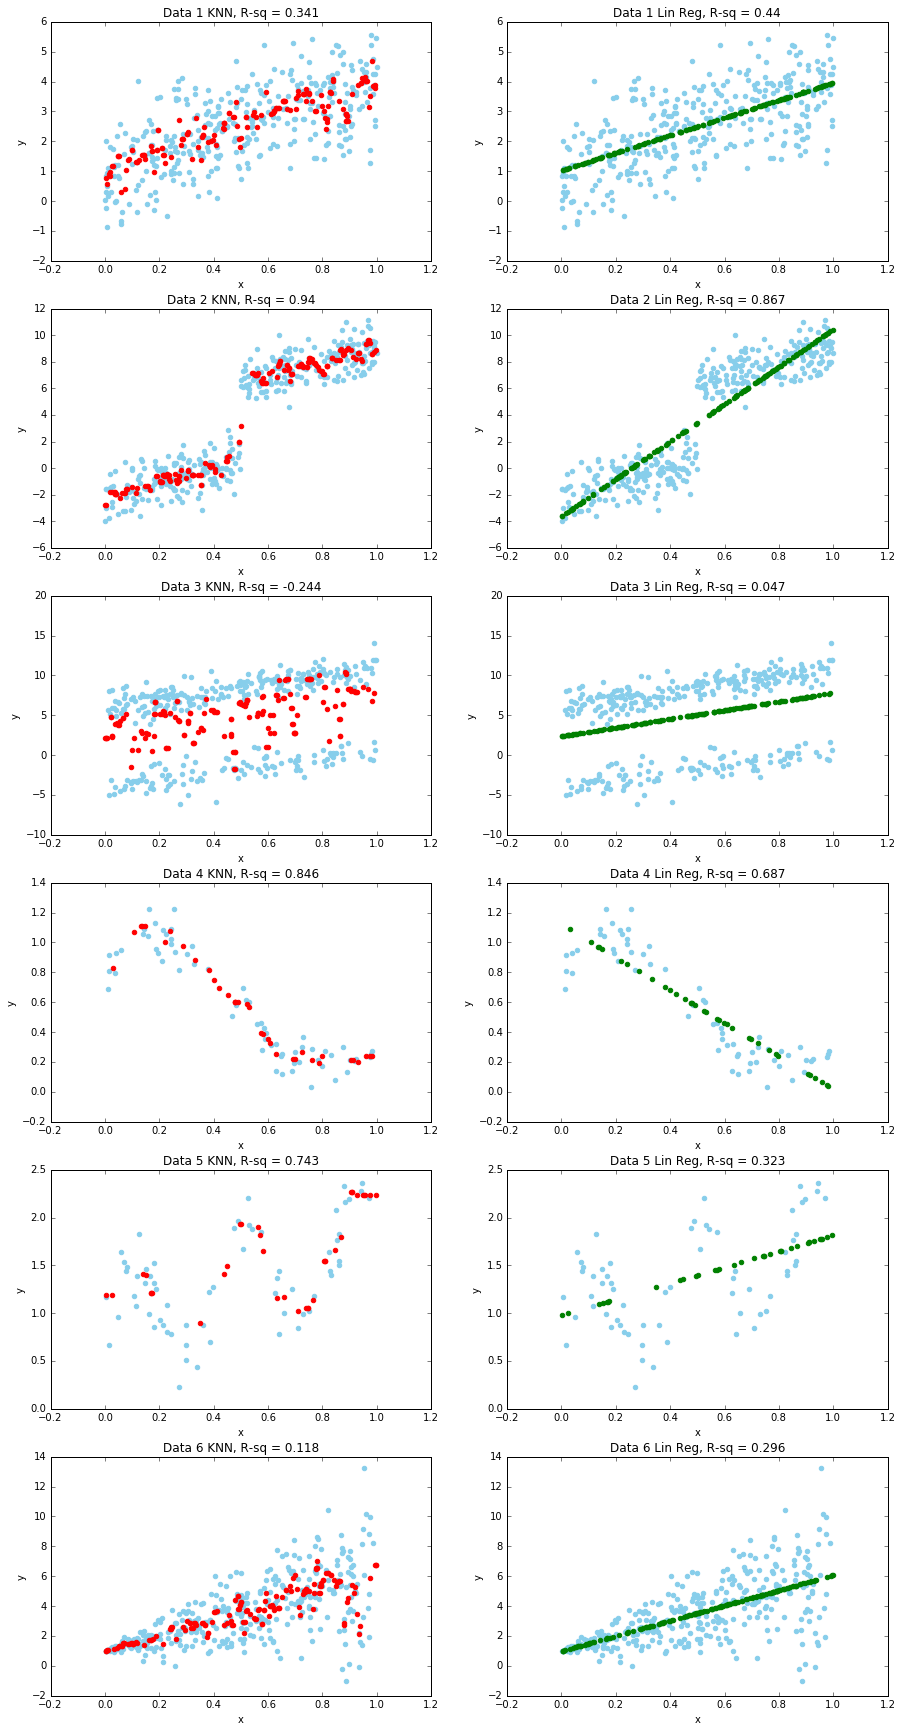

In [14]:
#Making plots

k=5

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), 
      (ax9, ax10), (ax11, ax12)) = plt.subplots(6, 2, figsize=(15, 30))

#Instead of copying and pasting 5 times, lets run a loop
data_list = ['dataset_1_missing.txt','dataset_2_missing.txt','dataset_3_missing.txt',
             'dataset_4_missing.txt','dataset_5_missing.txt','dataset_6_missing.txt']

full_data_list = ['dataset_1_full.txt','dataset_2_full.txt','dataset_3_full.txt',
                  'dataset_4_full.txt','dataset_5_full.txt','dataset_6_full.txt']

for data_name, data_name_full, i, ax1, ax2 in zip(data_list, full_data_list, range(1,7),
                                                 (ax1, ax3, ax5, ax7, ax9, ax11), 
                                                 (ax2, ax4, ax6, ax8, ax10, ax12)):
    
    df = pd.read_csv(data_name)
    full_df = pd.read_csv(data_name_full)
    
    missing_ind = df[df['y'].isnull()].index
    filled_ind = df[df['y'].notnull()].index

    predicted_knn, r_knn = fill_knn(df, full_df, missing_ind, filled_ind, k)

    predicted_lin, r_lin = fill_lin_reg(df, full_df, missing_ind, filled_ind)

    plot_missing(ax1, ax2, predicted_knn, round(r_knn, 3) , predicted_lin, round(r_lin, 3) , k, i)

plt.show()

**Data 1:** Both the linear model (R-sq = .44) and KNN (R-sq = .34) do an alright job imputing missing values. However, neither method does a good job accounting for the variability in y. This is because the linear model only imputes values along a straight line, and since most of the points are fairly close to the middle, KNN is much more influenced by the points in the middle. Nonetheless, the linear model does a slighlty better job because the relationship between x and y does appear to be linear.

**Data 2:** Although both models have very high R-squared values, it is clear that KNN does a better job. This is because the data form two distinct clusters, seperated by a significant amount of space. Because of this, interpolation between these two groups (which is what the linear model does) is not valid.

**Data 3:** Both models do a very poor job imputing missing values. This data also form two distinct clusters. And although each cluster has a fairly strong, linear relationship between x and y, when looked at together, the line of best fit falls in between each cluster. Likewise, KNN imputes missing values between each group. The fit would be significantly better if there was a seperate fit for each cluster. 

**Data 4:** For this data, the linear model is not a bad fit, but it is clear that it is not the best fit because the trend is not linear. And because KNN does not make the assumption of linearity, it does a much better job imputing missing values (R-sq = .85 vs R-sq = .69) 

**Data 5:** This one is similar to the one for data 4, but this time, the trend is extremely non-linear, so a line is not even a good approximation of the relationship between x and y (R-sq = .32). KNN does a much better job with an R-squared of .74.

**Data 6:** Although this trend does appear to be linear, the assumption of homoscedasticity (i.e. equal variance) is clearly violated since the spread of y changes drastically as x changes. Similarly to Data 1, it is interesting that the linear model does a better job (R-sq = .3) vs KNN (R-sq = .11), despite the fact that the KNN imputations do allow for heteroscedasticity. This may be because the linear model does a much better job predicting the mean of y given x, since the relationship between x and y is in fact linear. 

For k = 1 , R-sq = -0.068
For k = 2 , R-sq = 0.181
For k = 3 , R-sq = 0.258
For k = 4 , R-sq = 0.34
For k = 5 , R-sq = 0.341
For k = 6 , R-sq = 0.344
For k = 7 , R-sq = 0.342
For k = 8 , R-sq = 0.341
For k = 9 , R-sq = 0.359
For k = 10 , R-sq = 0.348
For k = 11 , R-sq = 0.343
For k = 12 , R-sq = 0.358
For k = 13 , R-sq = 0.36
For k = 14 , R-sq = 0.369
For k = 15 , R-sq = 0.386
For k = 16 , R-sq = 0.395
For k = 17 , R-sq = 0.401
For k = 18 , R-sq = 0.404
For k = 19 , R-sq = 0.414
For k = 20 , R-sq = 0.419
For k = 21 , R-sq = 0.413
For k = 22 , R-sq = 0.413
For k = 23 , R-sq = 0.417
For k = 24 , R-sq = 0.417
For k = 25 , R-sq = 0.415


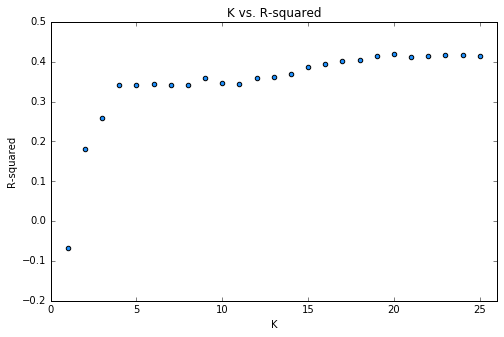

In [95]:
df = pd.read_csv('dataset_1_missing.txt')
full_df = pd.read_csv('dataset_1_full.txt')
    
missing_ind = df[df['y'].isnull()].index
filled_ind = df[df['y'].notnull()].index

r2_list=[]
for k in range(1, 26):
    predicted_knn, r_knn = fill_knn(df, full_df, missing_ind, filled_ind, k)
    r2_list.append(r_knn)
    print 'For k =', k, ',', 'R-sq =', round(r_knn, 3)

k_list = range(1, 26)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(k_list, r2_list, c='dodgerblue', alpha = 1)
ax.set_title('K vs. R-squared') 
ax.set_xlabel('K')
ax.set_ylabel('R-squared')
plt.xlim(0, 26)
    
plt.show()  


As we can see from the R-squared values, in this situation, small values of k (especially k=1) are not recommended. This is most likely because the particular value for only one or two observations is subject to much more random variation than the mean of several values. As a result, it is often preferable to combine the data from multiple similar observations instead (usually by taking their mean) because it provides more information and is subject to less variation. 

However, after about k=4, the R-squareds level off, and there does not appear to be any additional benefits for choosing a significantly higher k. 

---

## Problem 3: Is the Best (Linear Model) Good Enough?

In this problem, we will specifically look at conditions under which linear regression excels or fails.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

### Part (a): Introduction to Residual Plots

- Read ``dataset_1_full.txt``. Visualize the dataset and make some initial observations.


- For this data set, what can you say about the following linear fits: 

    1. slope = 0.4, intercept = 0.2
    2. slope = 0.4, intercept = 4
    3. linear regression model


- In each case, visualize the fit, compute the residuals, and make a residual plot of predicted values against residuals as well as a residual histogram. What do these plots reveal? 


- Calculate the R^2 coefficient for all three fits. What do the erors reveal? How do they compare to the residual plots?

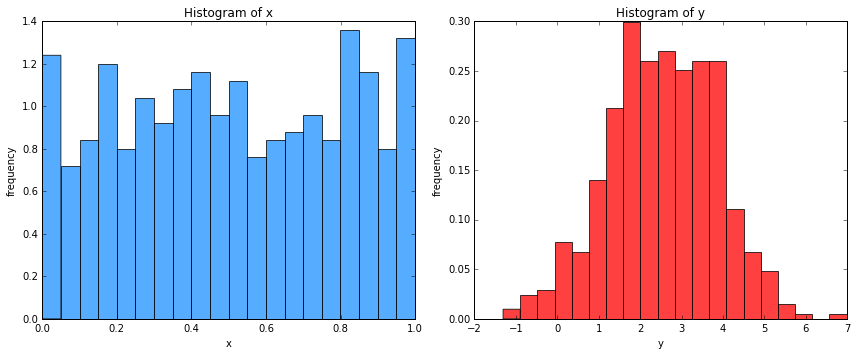

,x,y
count,500.000000,500.000000
mean,0.508327,2.540550
std,0.294466,1.313217
min,0.000133,-1.308618
25%,0.258050,1.654389
50%,0.500938,2.589774
75%,0.772561,3.506135
max,0.999833,6.983976


In [61]:
data1 = pd.read_csv('dataset_1_full.txt')

def plot_hist(data, title, x_lab, face, ax):
    
    ax.hist(data, 20, normed=1, facecolor=face, alpha=0.75)
    ax.set_title(title)
    ax.set_xlabel(x_lab)
    ax.set_ylabel('frequency')
    
    return ax
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_hist(data1['x'], 'Histogram of x', 'x', 'dodgerblue', ax1)
plot_hist(data1['y'], 'Histogram of y', 'y', 'red', ax2)

plt.tight_layout()
plt.show()

data1.describe()

Although x and y both have fairly symmetrical distributions, y is bell-shaped (may be approximately normal) and x has somewhat of a uniform distribution. x ranges from about 0 to 1, while y goes from about -1.3 to 7. y has a larger mean and spread compared to x. The data has 500 observations. 

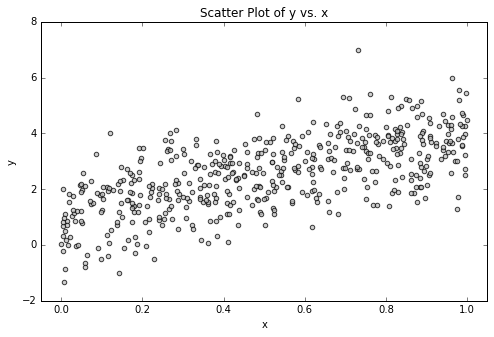

In [58]:
def plot_scatter(x, y, col, title, x_lab, y_lab, ax):
    
    ax.scatter(x, y, c=col, alpha = .75)

    ax.set_title(title) 
    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab)
    plt.xlim(min(x) - .05*(max(x)-min(x)), max(x) + .05*(max(x)-min(x)))
    

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
plot_scatter(data1['x'], data1['y'], 'silver', 'Scatter Plot of y vs. x', 'x', 'y', ax1)  

plt.show()

The scatter plot of x and y reveals a somewhat moderate, positive, linear relationship between x and y.

For this data set, what can you say about the following linear fits:

slope = 0.4, intercept = 0.2

slope = 0.4, intercept = 4

linear regression model

In each case, visualize the fit, compute the residuals, and make a residual plot of predicted values against residuals as well as a residual histogram. What do these plots reveal?

Calculate the R^2 coefficient for all three fits. What do the erors reveal? How do they compare to the residual plots?

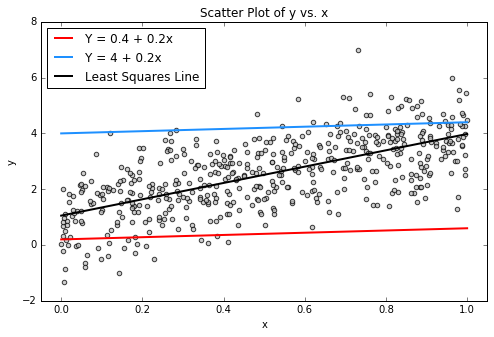

In [59]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
plot_scatter(data1['x'], data1['y'], 'silver', 'Scatter Plot of y vs. x', 'x', 'y', ax1) 

b0 = .2
b1 = .4
x = np.linspace(0,1,1000) #create sequence of 1000 numbers between 0 and 1 

line1, = ax1.plot(x, b0 + x*b1, 'r', linewidth=2, label='Y = 0.4 + 0.2x')

b0 = 4
line2, = ax1.plot(x, b0 + x*b1, 'dodgerblue', linewidth=2, label='Y = 4 + 0.2x')

lin_fit = np.polyfit(data1['x'], data1['y'], 1) #polynomial of degree 1 = linear
pred_fn = np.poly1d(lin_fit)
pred_y = pred_fn(data1['x'])

resid = data1['y'] - pred_y

line3, = ax1.plot(x, pred_fn(x), 'k' , linewidth=2, label='Least Squares Line')

plt.legend(handles=[line1, line2, line3], loc=2)

plt.show()

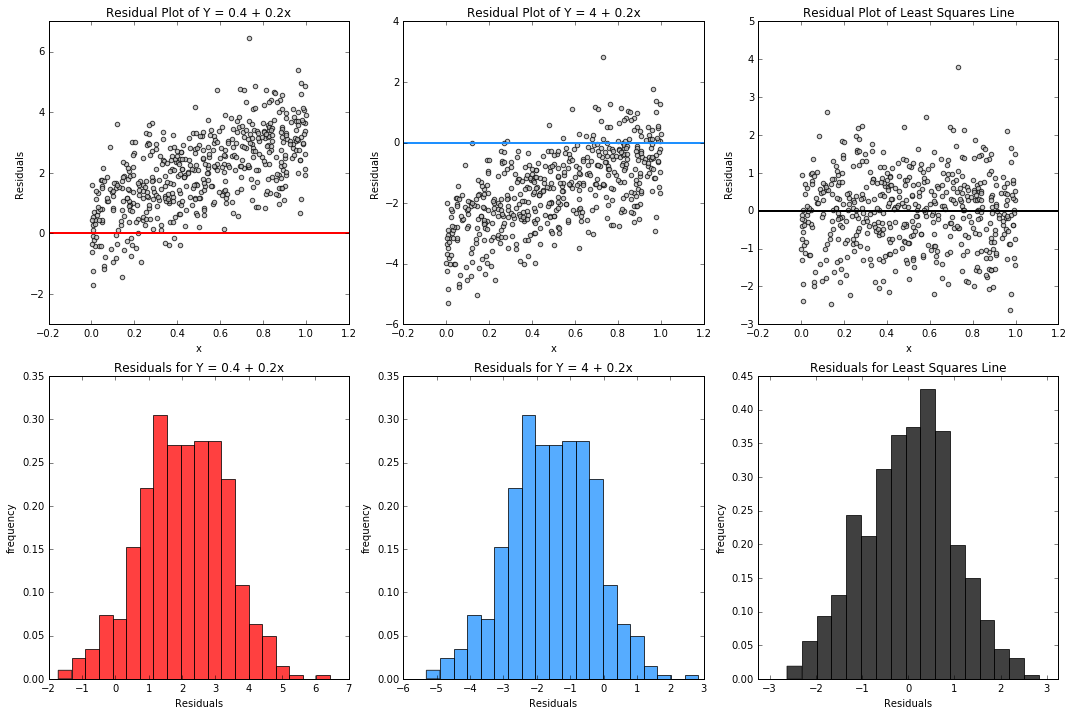

R-squared for Y = 0.4 + 0.2x: -2.359
R-squared for Y = 4 + 0.2x: -1.359
R-squared for Least Squares Line: 0.431


In [62]:
pred_y1 = .2*data1['x'] + .4
resid1 = data1['y'] - pred_y1

pred_y2 = .2*data1['x'] + 4
resid2 = data1['y'] - pred_y2

pred_y3 = pred_fn(data1['x'])
resid3 = data1['y'] - pred_y3

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))
plot_scatter(data1['x'], resid1, 'silver', 'Residual Plot of Y = 0.4 + 0.2x', 'x', 'Residuals', ax1) 
plot_scatter(data1['x'], resid2, 'silver', 'Residual Plot of Y = 4 + 0.2x', 'x', 'Residuals', ax2) 
plot_scatter(data1['x'], resid3, 'silver', 'Residual Plot of Least Squares Line', 'x', 'Residuals', ax3) 
ax1.axhline(y=0, linewidth=2, color = 'r')
ax2.axhline(y=0, linewidth=2, color = 'dodgerblue')
ax3.axhline(y=0, linewidth=2, color = 'k')

plot_hist(resid1, 'Residuals for Y = 0.4 + 0.2x', 'Residuals', 'r', ax4)
plot_hist(resid2, 'Residuals for Y = 4 + 0.2x', 'Residuals', 'dodgerblue', ax5)
plot_hist(resid3, 'Residuals for Least Squares Line', 'Residuals', 'k', ax6)
ax6.set_xlim(-3.25,3.25)

plt.tight_layout()
plt.show()

print 'R-squared for Y = 0.4 + 0.2x:', round(sk.metrics.r2_score(data1['y'], pred_y1), 3)
print 'R-squared for Y = 4 + 0.2x:', round(sk.metrics.r2_score(data1['y'], pred_y2), 3)
print 'R-squared for Least Squares Line:', round(sk.metrics.r2_score(data1['y'], pred_y3), 3)

For a good linear fit, the residual plot should reveal a fairly random scattering of points above and below the line y=0 with equal spread for all x. Aditionally, the histogram of the residuals should be approximately normally distributed with a mean of about 0. Consequently, the least squares fit (black) does appear to be a good fit for the data. It also has the highest R-squared value (.431) among the three fits.

Unsurprisingly, the other two fits are not so good. For the red fit, virtually all of the residuals are positive, indicating that we are consistently underpredicting the true y-values. Likewise for the blue fit, virtually all of the residuals are negative, indicating that we are consistently overerpredicting the actual y-values. The scatter plot clealry reveals this as well. Although the residuals for both fits seem to be fairly normal just based off of the histogram, they are clearly not centered at zero. And both of these fits actually have negative R-squared values. This may seem like a mistake at first, but this is simply because both fits are doing a worse job than a horizontal line at y-bar would do. A horizontal line at the average y-value would give you an R-squared of zero, so anything worse than that will give you a negative R-squared.

### Part (b): What do Residual Plots Reveal?

- Read datasets ``dataset_2_full.txt`` through ``dataset_6_full.txt``. In each case, visualize the fit of the linear regression model, compute the residuals, and make a residual plot of predicted values against residuals as well as a residual histogram. What do these plots reveal about the fit of the model? 


- Calculate the R^2 coefficient each fit. What do the erors reveal? How do they compare to the residual plots?


- Based on your analysis, form conjectures regarding the precise relationship between the residual plots and the fit of the linear regression model. Conjecture on the precise conditions under which linear regression model is an appropriate model for a given dataset.

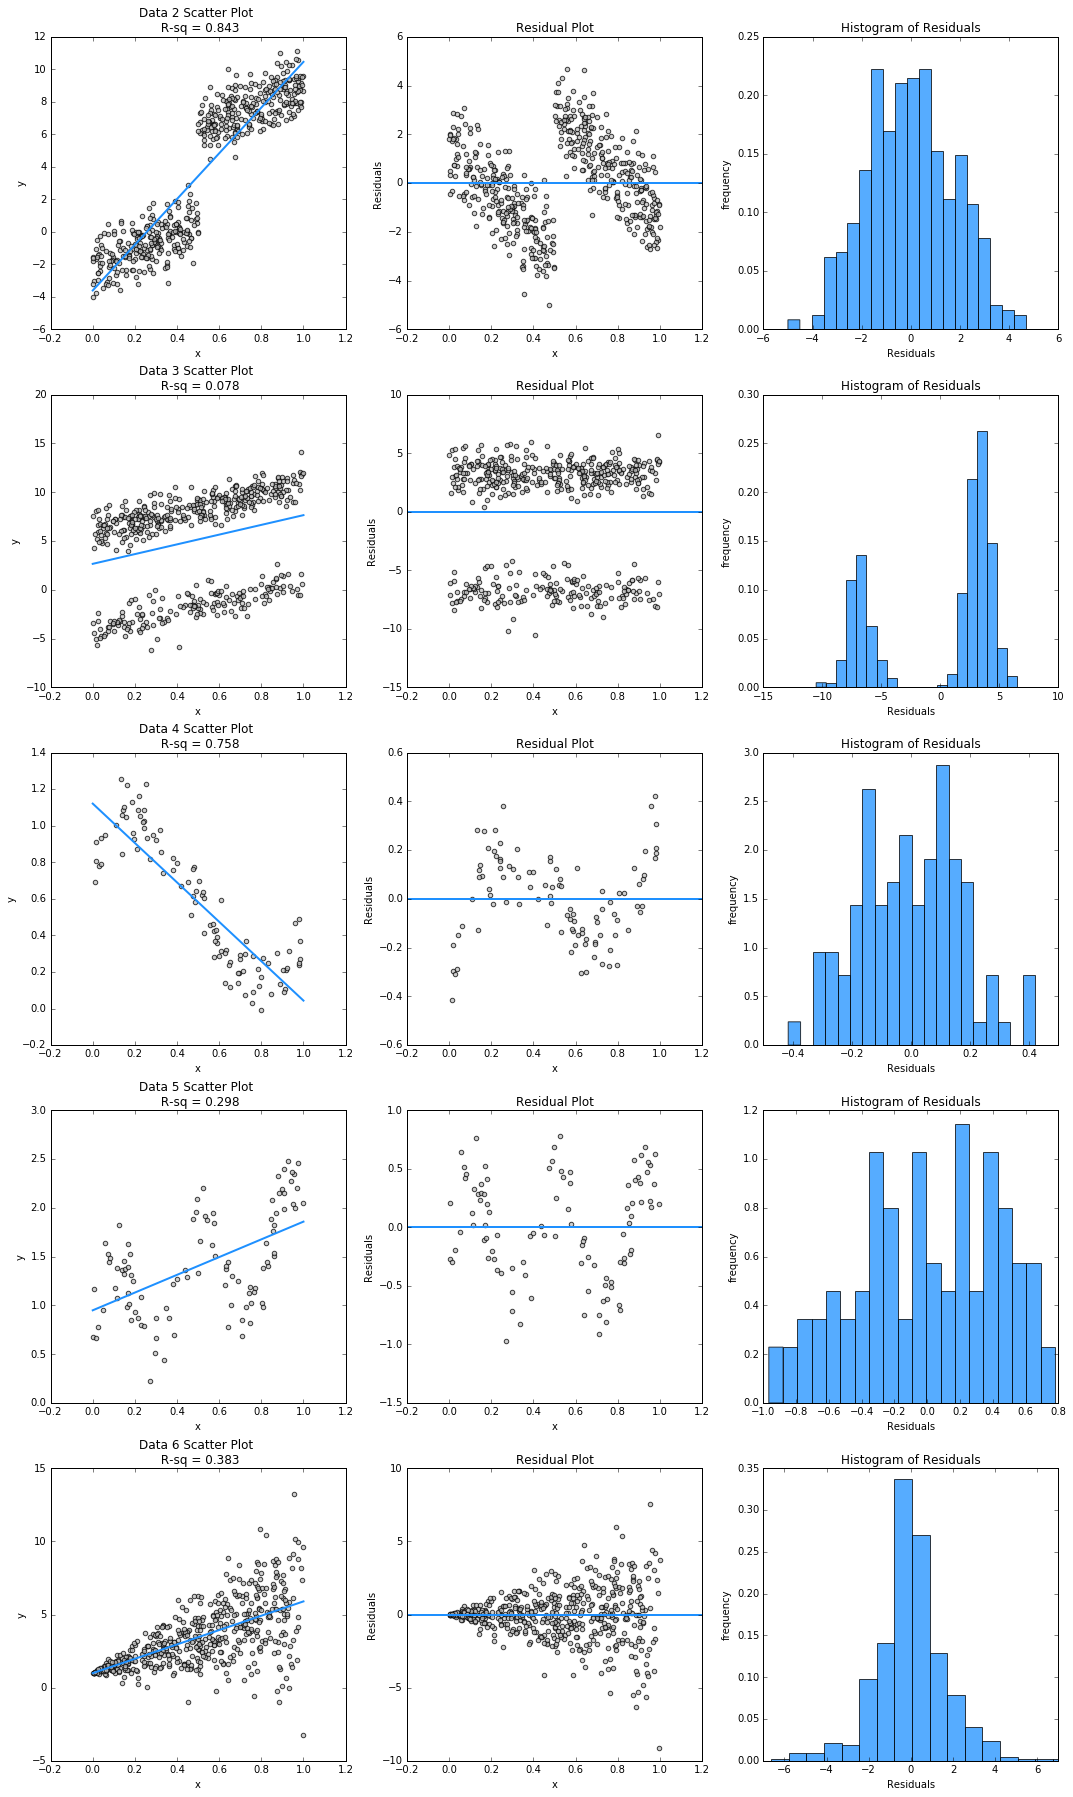

In [70]:
#Instead of copying and pasting, let's do a loop

data_list = ['dataset_2_full.txt','dataset_3_full.txt',
             'dataset_4_full.txt','dataset_5_full.txt','dataset_6_full.txt']

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9),
      (ax10, ax11, ax12),(ax13, ax14, ax15)) = plt.subplots(5, 3, figsize=(15, 25))

for dname, i, ax1, ax2, ax3 in zip(data_list, range(2,7),
                                  (ax1, ax4, ax7, ax10, ax13), 
                                  (ax2, ax5, ax8, ax11, ax14), 
                                  (ax3, ax6, ax9, ax12, ax15)):

    d = pd.read_csv(dname)
    
    lin_fit = np.polyfit(d['x'], d['y'], 1)
    pred_fn = np.poly1d(lin_fit)
    pred_y = pred_fn(d['x'])
    resid = d['y'] - pred_y
    R_sq = round(sk.metrics.r2_score(d['y'], pred_y), 3)
    
    plot_scatter(d['x'], d['y'], 'silver', 'Data ' + str(i) + ' Scatter Plot \n R-sq = ' + str(R_sq)  , 'x', 'y', ax1) 

    line, = ax1.plot(x, pred_fn(x), 'dodgerblue' , linewidth=2)

    plot_scatter(d['x'], resid, 'silver', 'Residual Plot', 'x', 'Residuals', ax2) 
    ax2.axhline(y=0, linewidth=2, color = 'dodgerblue')
    plot_hist(resid, 'Histogram of Residuals', 'Residuals', 'dodgerblue', ax3)

ax15.set_xlim(-7,7)
plt.tight_layout()
plt.show()

For a good linear fit, the scatter plot should reveal a linear relationship between x and y, the residual plot should reveal a fairly random scattering of points above and below the line y=0 with equal spread for all x. Aditionally, the histogram of the residuals should be approximately normally distributed with a mean of about 0.

**Data 2:** Although this model has a fairly high R-squared (.843), it is clear that a linear model is not a good fit for the data for two reasons. One, the data form two distinct clusters, seperated by a significant amount of space. Because of this, interpolation between these two groups is not valid. And secondly, the variance of the residuals is not consistent for all values of x.

**Data 3:** This data also form two distinct clusters. And although each cluster has a fairly strong, linear relationship between x and y, when looked at together, the line of best fit falls in between each cluster. So for one cluster, all the y-values are being underpredicted, and for the other, they are being overpredicted. This is also shown in the two distinct modes in the histogram of the residuals. The fit would be significantly better if there was a seperate fit for each cluster.

**Data 4:** This model also has a fairly high R-squared (.758), and that's because a linear model is not a bad fit, but it is clear that it is not the best fit. While looking at the residual plot, it becomes even more clear that the trend is not linear. This fit along with the fit for data 2 demonstrate the importance of not simply evaluating the quality of fit by looking at R-squared.

**Data 5:** This one is similar to the one for data 4, but this time, the trend is extremely non-linear, so a line is not even a good approximation of the relationship between x and y (R-squared = .298). The residuals are also clearly not normal.

**Data 6:** Although this trend does appear to be linear, the assumption of homoscedasticity (i.e. equal variance) is clearly violated since the spread of y changes drastically as x changes. As a result, confidence and prediction intervals will be too wide for small x and too narrow for large x. This could be potentially fixed with a transformation.    

---